## SpotiPy-Wrapped
#### By: Patrick D
### Usage Instructions:
1) Request your personal data from Spotify:  spotify.com -> my profile -> privacy -> request personal data -> wait a few days  
2) Unzip files into the input folder within this directory  
3) Change the 'directory' variable to point to your folder  
4) Run the notebook  
5) Change input variables of functions to get more specific information  

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import time
import datetime
# Jupyter theming options: 
# from jupyterthemes import jtplot
# jtplot.style()

### Data Cleaning

In [2]:
# Convert json files to pandas dataframe
# directory - the folder directory containing the json files
def read_history(directory):
    his_list = []
    i = 0
    for file in os.scandir(directory):
        if (file.path.endswith('.json') and file.is_file() and 'StreamingHistory' in file.path):
            i = i + 1
            temp = pd.read_json(file.path)
            his_list.append(temp)
    his = pd.concat(his_list)
    print('Files Included:', i, '\n')
    print('Unique Values:')
    print(his.apply(lambda x: x.nunique()))
    return his

In [3]:
# create listening history dataframe from desired directory within input folder
directory = 'input/12-06-21' # change this to '/input/your-directory-name'
his = read_history(directory)
# his.to_csv('~/Documents/Python/Spotify-Analysis/input/12-06-21/his.csv', index = False)
his.head(5)

Files Included: 8 

Unique Values:
endTime       53597
artistName     1987
trackName      6462
msPlayed      17700
dtype: int64


,endTime,artistName,trackName,msPlayed
0,2021-03-10 05:52,S N U G,Alaska,178119
1,2021-03-10 05:54,Mondo Loops,Goyo,133541
2,2021-03-10 05:56,Tom Doolie,Mavericks,120386
3,2021-03-10 05:58,G Mills,Drifting,133935
4,2021-03-10 06:02,Jhove,"i know, goodbye",188799


In [4]:
skipped = his[his['msPlayed'] < 30000]
unskipped = his[his['msPlayed'] >= 30000]

# This line causes the error, fix at some point
unskipped['endTime'] = pd.to_datetime(unskipped['endTime'])

tracks = unskipped['trackName'].value_counts()
artists = unskipped['artistName'].value_counts() 
# for relative frequency add 'normalize = True' within value_counts()

skipped_tracks = skipped['trackName'].value_counts()
skipped_artists = skipped['artistName'].value_counts()

<ipython-input-4-6387f7716069>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unskipped['endTime'] = pd.to_datetime(unskipped['endTime'])


### Graphs

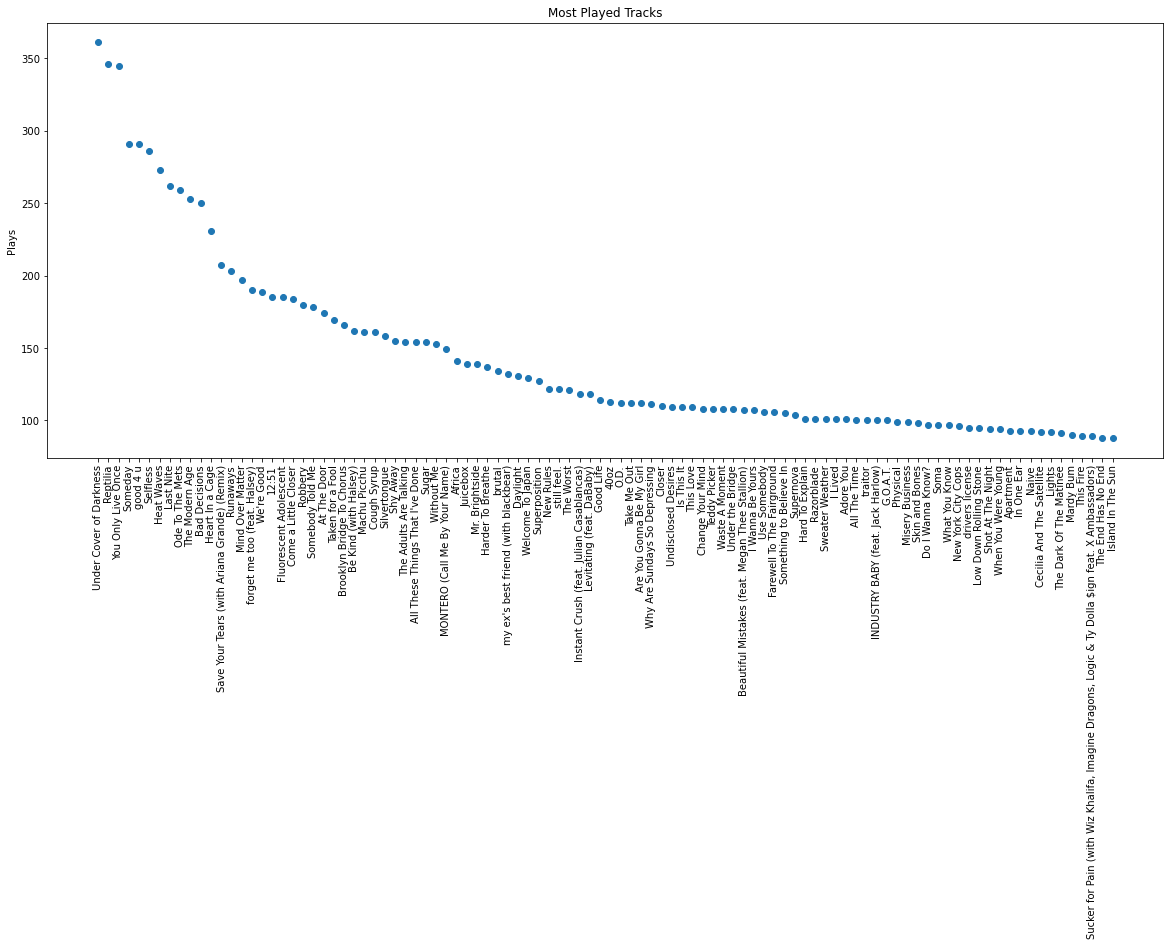

In [5]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(tracks.head(100), 'o')
plt.xticks(rotation = 90)
plt.title('Most Played Tracks')
plt.ylabel('Plays')
plt.show()

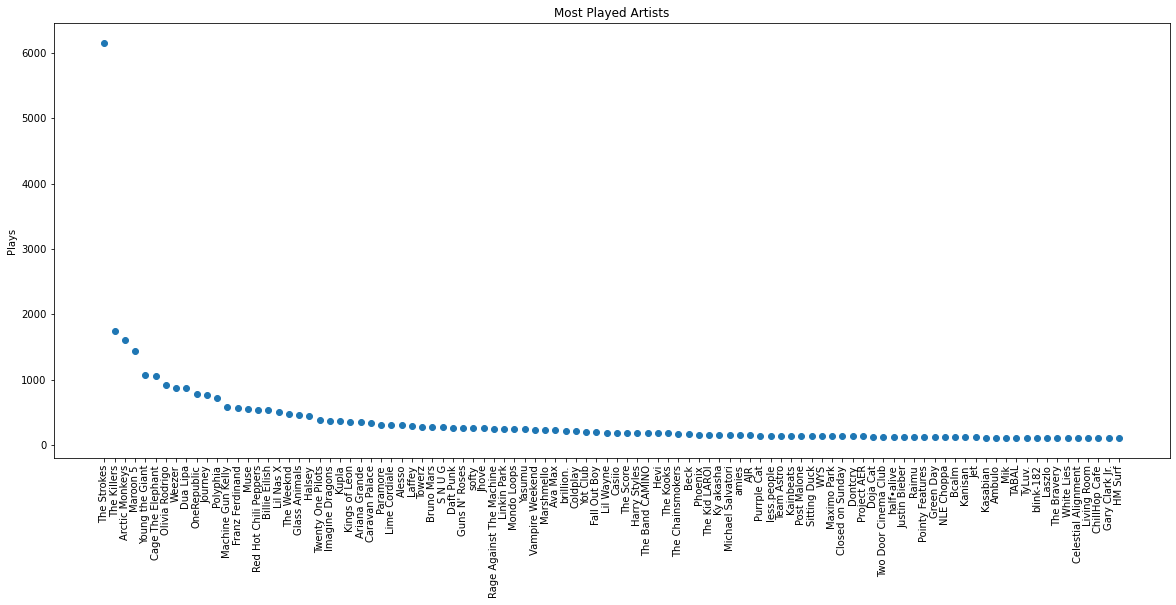

In [6]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(artists.head(100), 'o')
plt.xticks(rotation = 90)
plt.title('Most Played Artists')
plt.ylabel('Plays')
plt.show()

In [7]:
plt.rcParams['figure.figsize'] = [20, 8]
def plotArtist(artistname, numtracks):
    artistdata = unskipped[unskipped['artistName'] == artistname]
    artistdata = artistdata['trackName'].value_counts()
    plt.plot(artistdata.head(numtracks), 'o')
    plt.xticks(rotation = 90)
    plt.title('Most played songs by ' + artistname)
    plt.ylabel('Plays')
    plt.show()

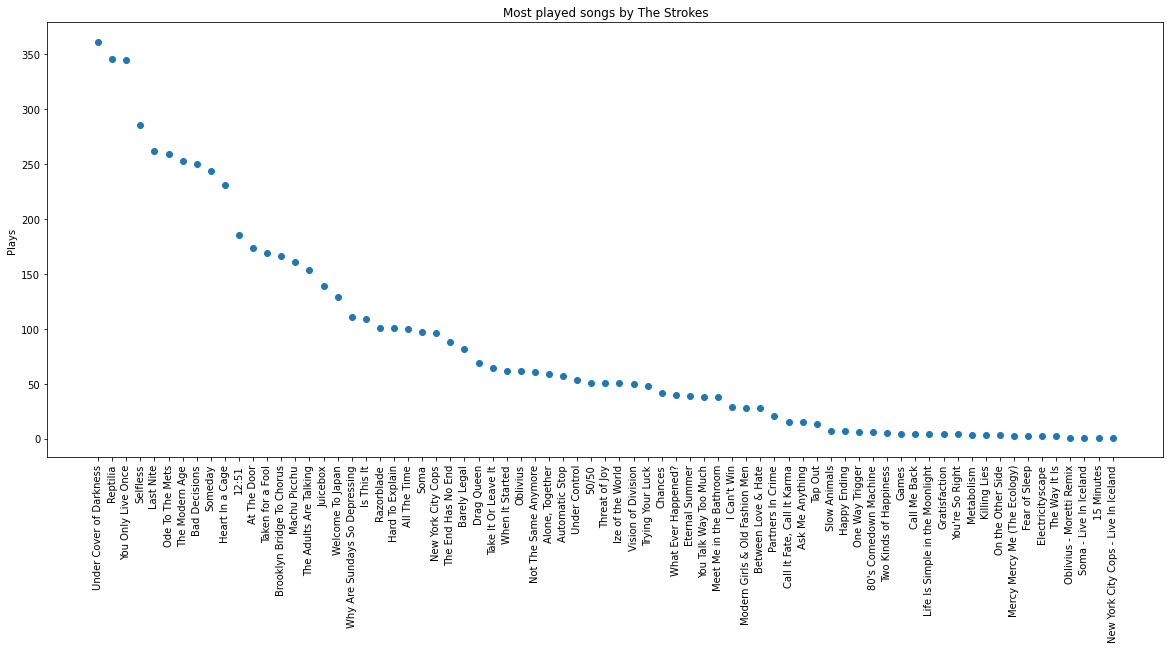

In [8]:
plotArtist("The Strokes", 100)

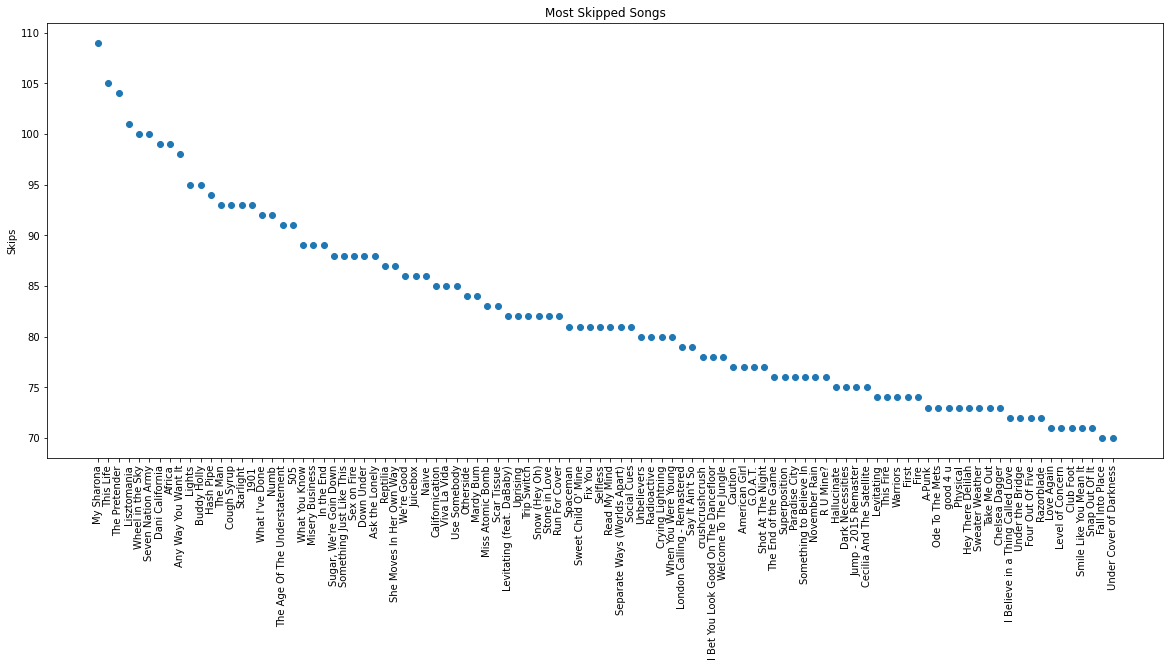

In [9]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(skipped_tracks.head(100), 'o')
plt.xticks(rotation = 90)
plt.title('Most Skipped Songs')
plt.ylabel('Skips')
plt.show()

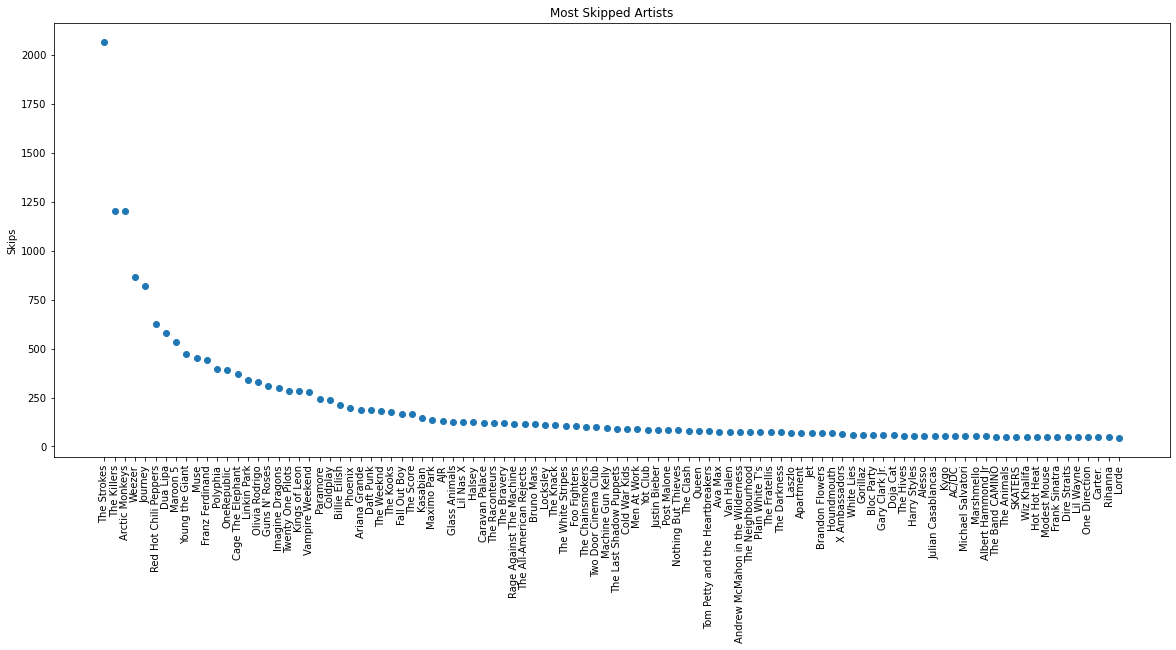

In [10]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(skipped_artists.head(100), 'o')
plt.xticks(rotation = 90)
plt.title('Most Skipped Artists')
plt.ylabel('Skips')
plt.show()

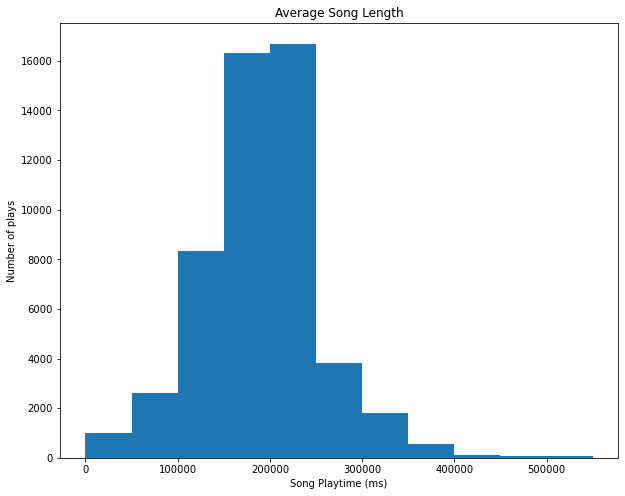

In [19]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.hist(unskipped['msPlayed'], 
         bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000])
plt.xlabel("Song Playtime (ms)")
plt.ylabel("Number of plays")
plt.title("Average Song Length")
plt.show()

### Other Information

In [14]:
# TODO - change to output in the form of 'songPlayCount' function 
def topSongPlays(numsongs):
    int(numsongs)
    print('Your top', numsongs, 'songs: ')
    print('Song                       Plays')
    print(tracks.head(numsongs))    

In [21]:
# change n to find your n top songs
n = 10
topSongPlays(n)

Your top 10 songs: 
Song                       Plays
Under Cover of Darkness    361
Reptilia                   346
You Only Live Once         345
Someday                    291
good 4 u                   291
Selfless                   286
Heat Waves                 273
Last Nite                  262
Ode To The Mets            259
The Modern Age             253
Name: trackName, dtype: int64


In [22]:
# get total playtime
playtime = unskipped['msPlayed'].sum()
playtime = playtime / 60000
playtime = int(playtime)
print("Total minutes listened:", playtime)

Total minutes listened: 173076


### Artist/Song specific information

In [11]:
def artistPlayCount(artistname):
    plays = unskipped[unskipped['artistName'] == artistname]
    plays = plays.apply(lambda x: x.nunique())
    return plays[0]
    
def songPlayCount(trackname):
    plays = unskipped[unskipped['trackName'] == trackname]
    plays = plays.apply(lambda x: x.nunique())
    return plays[0]

In [12]:
artist = 'The Strokes' # change this to an artist of your choice (case sensitive)
temp = artistPlayCount(artist)
print("You have listened to", artist, temp, "times")

You have listened to The Strokes 6145 times


In [13]:
track = 'Selfless' # change this to a song name of your choice (case sensitive)
temp = songPlayCount(track)
print("You have listened to", track, temp, "times")

You have listened to Selfless 286 times


### Timeframe specific information

In [16]:
def topSongsTimeframe(timestamp):
    plt.rcParams['figure.figsize'] = [20, 8]
    # convert input into timestamp format
    element = datetime.datetime.strptime(timestamp, "%Y-%m-%d")
    times = unskipped[unskipped['endTime'] >= element]
    temp = times['trackName'].value_counts() 
    plt.plot(temp.head(100), 'o')
    plt.xticks(rotation = 90)
    plt.title('Top Tracks Since ' + timestamp)
    plt.ylabel('Plays')
    plt.show()
    return(temp.head(10))
    
def topSongsTimeframeBounded(lower, upper):
    plt.rcParams['figure.figsize'] = [20, 8]
    element_l = datetime.datetime.strptime(lower, "%Y-%m-%d")
    element_u = datetime.datetime.strptime(upper, "%Y-%m-%d")
    times = unskipped[unskipped['endTime'] >= element_l] 
    times = times[times['endTime'] <= element_u]
    temp = times['trackName'].value_counts() 
    plt.plot(temp.head(100), 'o')
    plt.xticks(rotation = 90)
    plt.title('Top tracks between ' + lower + ' and ' + upper)
    plt.ylabel('Plays')
    plt.show()
    return (temp.head(10))

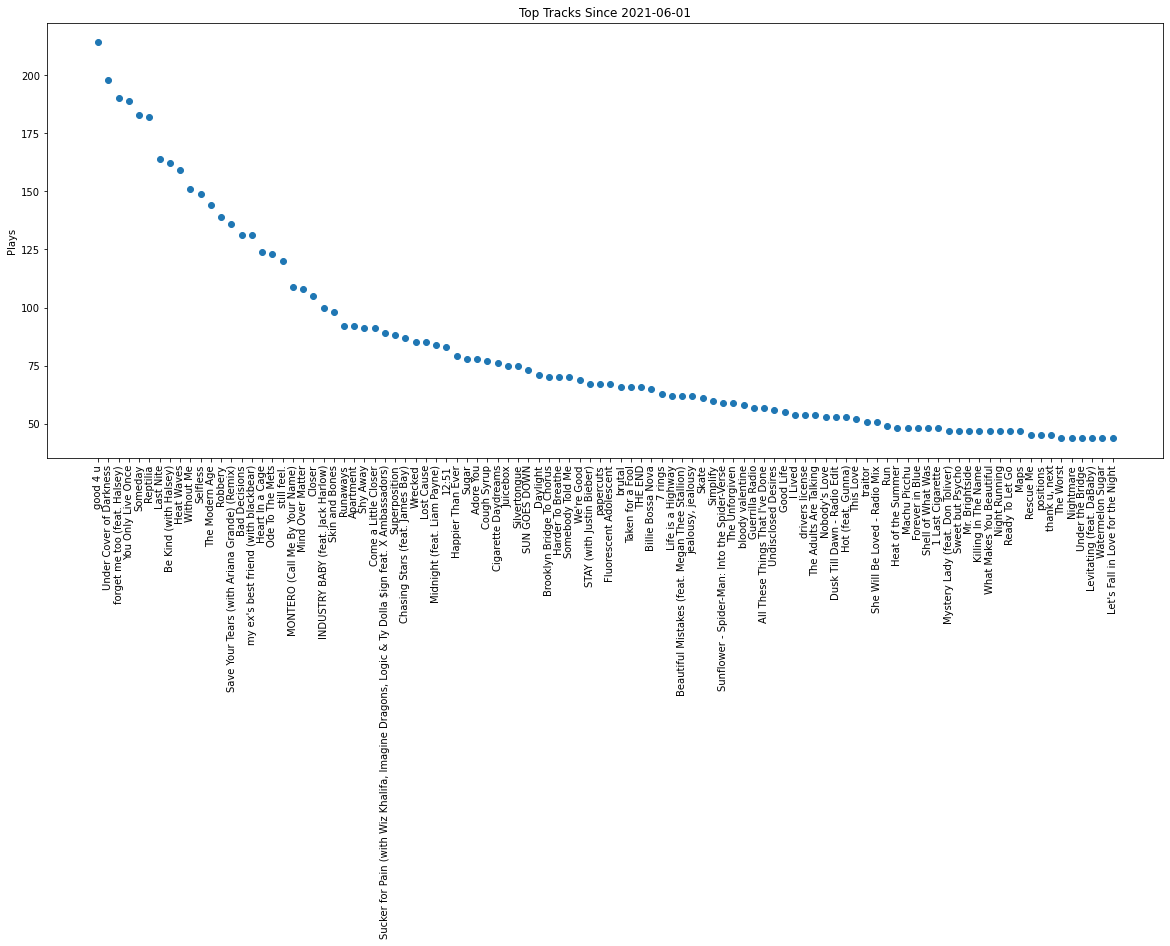

good 4 u                        214
Under Cover of Darkness         198
forget me too (feat. Halsey)    190
You Only Live Once              189
Someday                         183
Reptilia                        182
Last Nite                       164
Be Kind (with Halsey)           162
Heat Waves                      159
Without Me                      151
Name: trackName, dtype: int64

In [26]:
# Plot top songs since input date
# format: 'year-month-day'
#         'xxxx-xx-xx'
timeframe = '2021-06-01' # change this
topSongsTimeframe(timeframe)

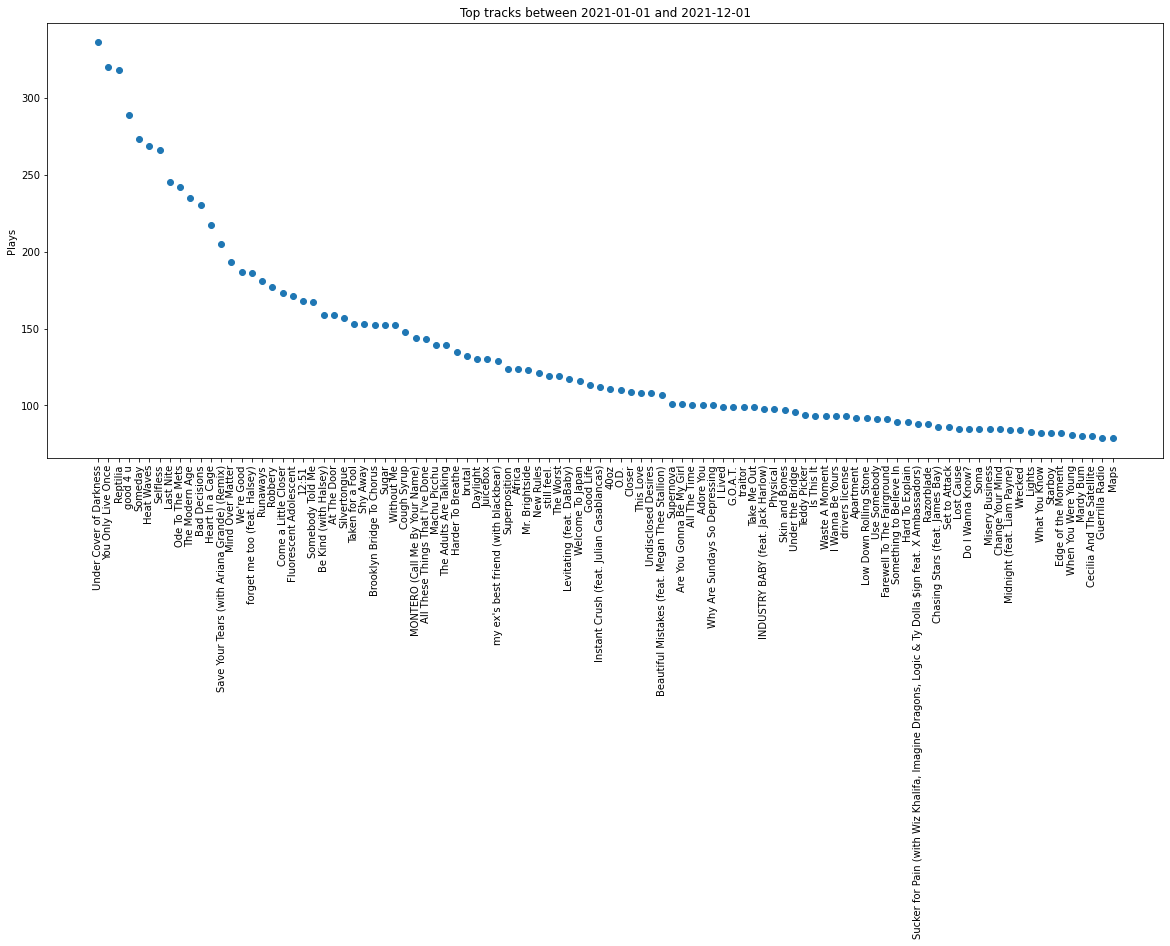

Under Cover of Darkness    336
You Only Live Once         320
Reptilia                   318
good 4 u                   289
Someday                    273
Heat Waves                 269
Selfless                   266
Last Nite                  245
Ode To The Mets            242
The Modern Age             235
Name: trackName, dtype: int64

In [23]:
# Plot top songs since input date
# format: 'year-month-day'
#         'xxxx-xx-xx'
timeframe_lower = '2021-01-01' # change this - lower bound
timeframe_upper = '2021-12-01' # change this - upper bound
topSongsTimeframeBounded(timeframe_lower, timeframe_upper)